In [13]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Activation
from keras.layers import Conv2D,MaxPooling2D
from keras import backend as K #it reads dimensions of the cnn
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import np_utils

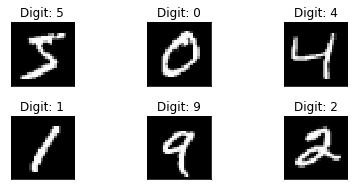

In [14]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
fig = plt.figure()
for i in range(6):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])


Text(0.5, 1.0, 'Pixel Value Distribution')

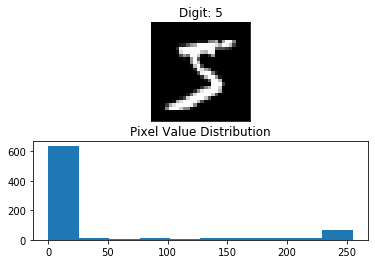

In [15]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.imshow(X_train[0], cmap='gray', interpolation='none')
plt.title("Digit: {}".format(y_train[0]))
plt.xticks([])
plt.yticks([])
plt.subplot(2,1,2)
plt.hist(X_train[0].reshape(784)) 
plt.title("Pixel Value Distribution")


In [16]:
batch_size=128
num_classes=10
epochs=12
img_rows,img_cols=28,28 #input image dimensions

print(X_train[0]) #2D matrix - matrix of order 28*28
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)



[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [17]:
X_train = X_train.reshape(60000, 784)#784 dimensions
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
print("X_train shape", X_ train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)


X_train shape (60000, 784)
y_train shape (60000,)
X_test shape (10000, 784)
y_test shape (10000,)


In [18]:
print(X_train[0])
print("X_train shape", X_train.shape)


[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
  18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253.
 253. 253. 253. 253. 225. 172. 253. 242. 195.  64.   0.   0.   0.   0.
   0. 

In [19]:
#normalisation of vectors
X_train /= 255
X_test /= 255
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [20]:

print(np.unique(y_train, return_counts=True))
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)
print("Shape after one-hot encoding: ", Y_train.shape)
print("class label of y_train[0]",y_train[0])
print("class label of y_train[0]",Y_train[0])

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949],
      dtype=int64))
Shape after one-hot encoding:  (60000, 10)
class label of y_train[0] 5
class label of y_train[0] [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [21]:
#dimension reduction to 512
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))                            
model.add(Dropout(0.2))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 512)               401920    
_________________________________________________________________
activation_7 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_8 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)               

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 6s - loss: 0.2476 - accuracy: 0.9258 - val_loss: 0.1055 - val_accuracy: 0.9663
Epoch 2/20
 - 6s - loss: 0.1000 - accuracy: 0.9697 - val_loss: 0.0748 - val_accuracy: 0.9776
Epoch 3/20
 - 7s - loss: 0.0719 - accuracy: 0.9769 - val_loss: 0.0721 - val_accuracy: 0.9772
Epoch 4/20
 - 8s - loss: 0.0558 - accuracy: 0.9815 - val_loss: 0.0708 - val_accuracy: 0.9787
Epoch 5/20
 - 7s - loss: 0.0454 - accuracy: 0.9852 - val_loss: 0.0643 - val_accuracy: 0.9812
Epoch 6/20
 - 9s - loss: 0.0378 - accuracy: 0.9880 - val_loss: 0.0705 - val_accuracy: 0.9797
Epoch 7/20
 - 9s - loss: 0.0345 - accuracy: 0.9885 - val_loss: 0.0576 - val_accuracy: 0.9848
Epoch 8/20
 - 10s - loss: 0.0315 - accuracy: 0.9892 - val_loss: 0.0554 - val_accuracy: 0.9834
Epoch 9/20
 - 10s - loss: 0.0280 - accuracy: 0.9903 - val_loss: 0.0706 - val_accuracy: 0.9811
Epoch 10/20
 - 10s - loss: 0.0229 - accuracy: 0.9924 - val_loss: 0.0667 - val_accuracy: 0.9834
Epoch 11/20
 - 9

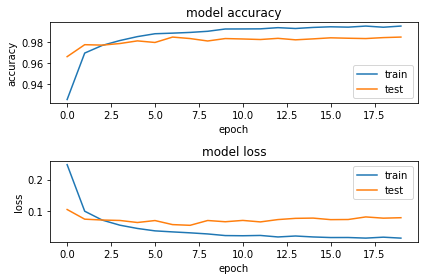

In [22]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
history = model.fit(X_train, Y_train,
          batch_size=128, epochs=20,
          verbose=2,
          validation_data=(X_test, Y_test))
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

loss_and_metrics = model.evaluate(X_test, Y_test, verbose=2)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

In [23]:
loss_and_metrics = model.evaluate(X_test, Y_test, verbose=2)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

Test Loss 0.07945909368996715
Test Accuracy 0.9847999811172485



9848  classified correctly
152  classified incorrectly


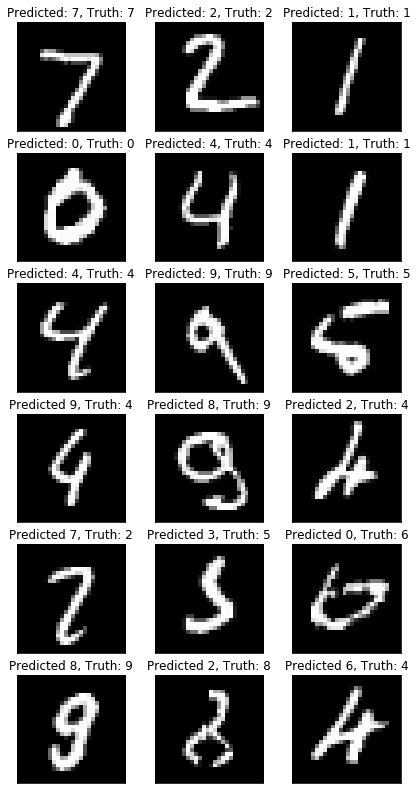

In [24]:
predicted_classes = model.predict_classes(X_test)

# see which we predicted correctly and which not
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]
print()
print(len(correct_indices)," classified correctly")
print(len(incorrect_indices)," classified incorrectly")

# adapt figure size to accomodate 18 subplots
plt.rcParams['figure.figsize'] = (7,14)

figure_evaluation = plt.figure()

# plot 9 correct predictions
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(6,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted: {}, Truth: {}".format(predicted_classes[correct],
                                        y_test[correct]))
    plt.xticks([])
    plt.yticks([])

# plot 9 incorrect predictions
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(6,3,i+10)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')#Increasing the dimensions
    plt.title(
      "Predicted {}, Truth: {}".format(predicted_classes[incorrect], 
                                       y_test[incorrect]))
    plt.xticks([])
    plt.yticks([])

FUTURE IMPROVEMENT- PRINCIPAL COMPONENT ANALYSIS

In [10]:
from sklearn.datasets import load_digits
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
digits = load_digits()
digits.data.shape

(1797, 64)

In [11]:
from sklearn.decomposition import PCA
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


The data consists of 8×8 pixel images, meaning that they are 64-dimensional. 
To gain some intuition into the relationships between these points, 
we can use PCA to project them to a more manageable number of dimensions, say two:

The full data is a 64-dimensional point cloud, 
and these points are the projection of each data point along the directions 
with the largest variance. Essentially, we have found the optimal stretch 
and rotation in 64-dimensional space that allows us to see the layout of the digits in two dimensions,
and have done this in an unsupervised manner—that is, without reference to the labels.

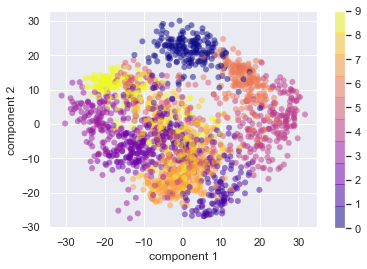

In [12]:

plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('plasma', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

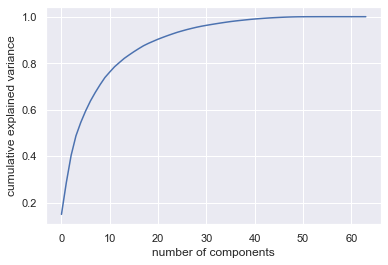

In [13]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

This curve quantifies how much of the total, 64-dimensional variance is contained within the first 65 components. 
For example, we see that with the digits the first 10 components contain approximately 75% of the variance,
while you need around 50 components to describe close to 100% of the variance.

Here we see that our two-dimensional projection loses a lot of information (as measured by the explained variance) 
and that we'd need about 20 components to retain 90% of the variance. 
Looking at this plot for a high-dimensional dataset can help you understand the level of redundancy present 
in multiple observations.



PCA for Noise Filtering -preventing "Underfitting"
PCA can also be used as a filtering approach for noisy data. The idea is this: any components 
with variance much larger than the effect of the noise should be relatively unaffected by the noise. 
So if you reconstruct the data using just the largest subset of principal components, 
you should be preferentially keeping the 
signal and throwing out the noise.

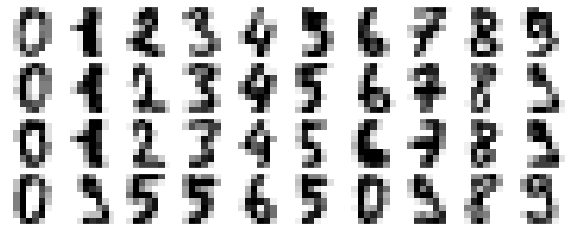

In [14]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data)


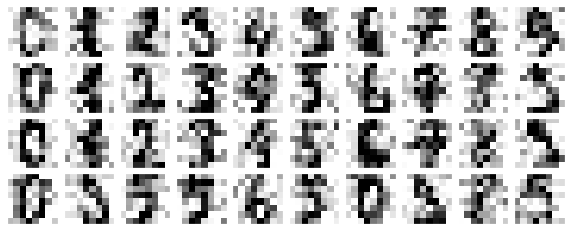

In [15]:
#adding noise and replotting

np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

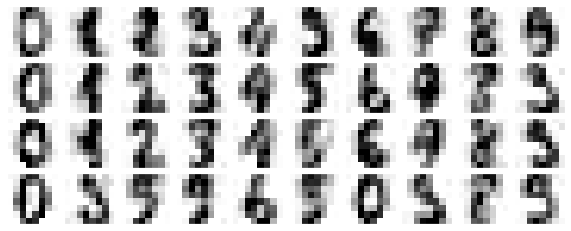

In [16]:
#It's clear by eye that the images are noisy, and contain spurious pixels. 
#Let's train a PCA on the noisy data, requesting that the projection preserve 50% of the variance:
pca = PCA(0.50).fit(noisy)
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)


This signal preserving/noise filtering property makes PCA a very useful feature selection routine—for example, 
rather than training a classifier on very high-dimensional data, 
you might instead train the classifier on the lower-dimensional representation, 
which will automatically serve to filter out random noise in the inputs.

